In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = int(np.amax(y)) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X.iloc[:,0].min()
    x_max = X.iloc[:,0].max()
    y_min = X.iloc[:,1].min()
    y_max = X.iloc[:,1].max()
    x2, y2 = np.meshgrid(np.arange(x_min - k, x_max + k, h), np.arange(y_min - k, y_max + k, h))
    # numpy.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


In [12]:
fruits = pd.read_table('assets/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']
y_fruits_apple = y_fruits_2d == 1


In [44]:
X_train, X_test, y_train, y_test = (
    train_test_split(X_fruits_2d,
                    y_fruits_apple,
                    random_state = 0))
clf = LogisticRegression(C=100).fit(X_train, y_train)


In [45]:
print((clf.coef_,clf.intercept_,clf.score(X_train,y_train),clf.score(X_test,y_test)))

(array([[-0.91332128,  2.20881412]]), array([-9.68687549]), 0.7954545454545454, 0.7333333333333333)


A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.73


F:\Program Files\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
F:\Program Files\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
F:\Program Files\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


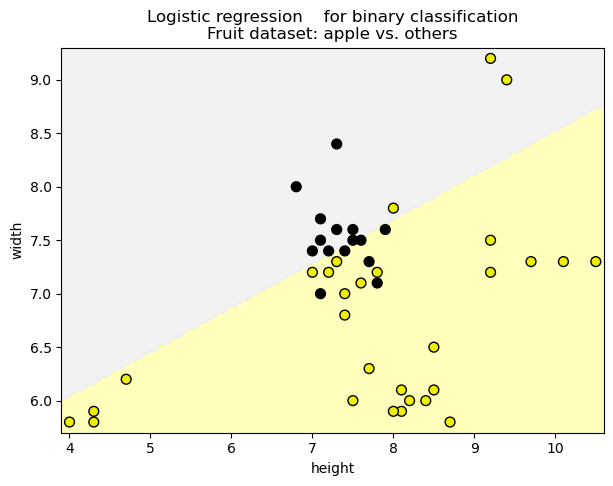

In [35]:
fig, subaxes = plt.subplots(1,1,figsize=(7,5))
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, 'Logistic regression\
    for binary classification\nFruit dataset: apple vs. others', subaxes)


h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][int(clf.predict([[h,w]])[0])]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][int(clf.predict([[h,w]])[0])]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


In [58]:
from sklearn.datasets import load_breast_cancer

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

X_train_df = pd.DataFrame(X_train)

clf = LogisticRegression(C=0.1).fit(X_train, y_train)
print('the accuracy for training and test dataset are {:.3f} and {:.3f}'.format(clf.score(X_train,y_train),clf.score(X_test,y_test)))


the accuracy for training and test dataset are 0.948 and 0.944


F:\Program Files\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


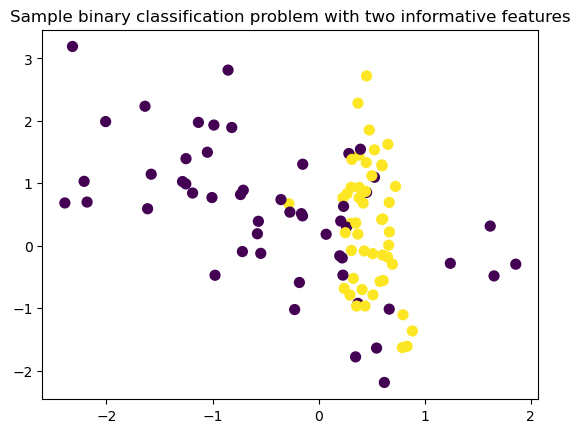

In [60]:
from sklearn.datasets import make_classification
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features = 2, n_redundant = 0,
                                 n_informative =2, n_clusters_per_class = 1, flip_y = 0.1,
                                 class_sep = 0.5, random_state = 0)

plt.scatter(X_C2[:,0], X_C2[:,1], c = y_C2, marker = 'o', s = 50)
plt.show()

(array([[1.19691325, 0.08330787]]), array([0.19103988]), 0.7733333333333333, 0.72)


F:\Program Files\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Program Files\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


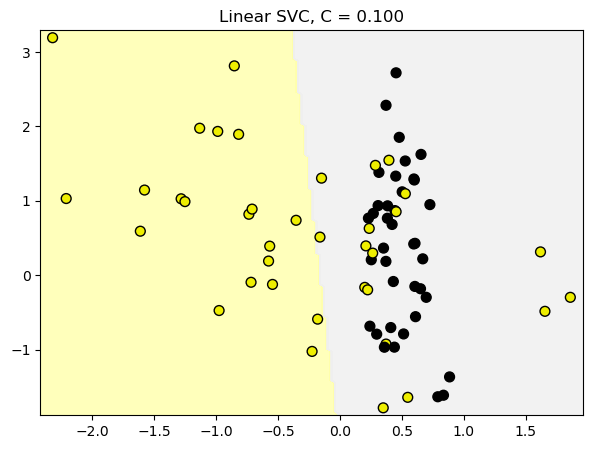

In [93]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

fig, subaxes = plt.subplots(1,1,figsize=(7,5))

this_C = 0.1

clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)
print((clf.coef_, clf.intercept_, clf.score(X_train, y_train), clf.score(X_test,y_test)))

In [91]:
from sklearn.svm import LinearSVC

this_C =1
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC(C=this_C).fit(X_train, y_train)
print('accuracy for training is {:.3f} and test is {:.3f}'.format(clf.score(X_train, y_train),clf.score(X_test, y_test)))

accuracy for training is 0.930 and test is 0.944


F:\Program Files\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits, random_state = 0)
clf = LinearSVC(C=5,random_state=67).fit(X_train, y_train)
print((clf.coef_,clf.intercept_))

(array([[-0.30006303,  0.71557482],
       [-1.62785586,  1.15837035],
       [ 0.00721513,  0.43311565],
       [ 1.2474674 , -1.64209043]]), array([-3.28519908,  1.19823407, -3.04188368,  1.16397746]))


F:\Program Files\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [122]:
xt = pd.DataFrame([[10,15],[1,1],[5,8],[3,3],[7,5],[15,12]])
clf.predict(xt)


F:\Program Files\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([1, 4, 2, 4, 4, 3], dtype=int64)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_apple, random_state = 0)

train_test_scores = []
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        clf = SVC(kernel = 'rbf', gamma=gamma, C=C).fit(X_train,y_train)
        train_test_scores.append([gamma,C,'%.2f'%clf.score(X_train,y_train),'%.2f'%clf.score(X_test,y_test)])
        
train_test_scores = pd.DataFrame(data=train_test_scores, columns = ['Gamma','C','training score','test score']).apply(pd.to_numeric)

scores_gamma = train_test_scores.groupby('Gamma').agg({'training score':np.nanmean,'test score':np.nanmean}).round(3)
scores_C = train_test_scores.groupby('C').agg({'training score':np.nanmean,'test score':np.nanmean}).round(3)

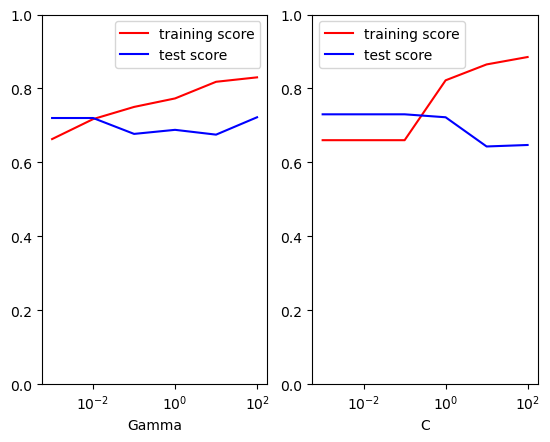

In [157]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(scores_gamma.index, scores_gamma['training score'],'r-')
ax1.plot(scores_gamma.index, scores_gamma['test score'],'b-')
ax1.set_xscale('log')
ax1.set_xlabel('Gamma')
ax1.set_ylim([0,1])
ax1.legend(labels = ['training score','test score'])


ax2.plot(scores_C.index, scores_C['training score'],'r-')
ax2.plot(scores_C.index, scores_C['test score'],'b-')
ax2.set_xscale('log')
ax2.set_xlabel('C')
ax2.set_ylim([0,1])
ax2.legend(labels = ['training score','test score'])

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

for C in [0.1, 1, 10]:
    clf = SVC(kernel = 'rbf',C=C).fit(X_train, y_train)
    print('when C is {}, the training and test set scores are {:.3f} and {:.3f}'.format(
        C, clf.score(X_train,y_train),clf.score(X_test, y_test)))

when C is 0.1, the training and test set scores are 0.887 and 0.902
when C is 1, the training and test set scores are 0.904 and 0.937
when C is 10, the training and test set scores are 0.915 and 0.937


In [163]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for C in [0.1, 1, 10]:
    clf = SVC(kernel = 'rbf',C=C).fit(X_train_scaled, y_train)
    print('when C is {}, the training and test set scores are {:.3f} and {:.3f}'.format(
        C, clf.score(X_train_scaled,y_train),clf.score(X_test_scaled, y_test)))

when C is 0.1, the training and test set scores are 0.948 and 0.958
when C is 1, the training and test set scores are 0.984 and 0.972
when C is 10, the training and test set scores are 0.988 and 0.972


In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5)
clf2 = LinearSVC(C=5,random_state=67)

X = X_fruits_2d
y = y_fruits
cv_scores = cross_val_score(clf,X,y)
cv_scores2 = cross_val_score(clf2,X,y)

print(cv_scores, np.mean(cv_scores))
print(cv_scores2, np.mean(cv_scores2))


[0.75       0.75       0.83333333 0.83333333 0.81818182] 0.7969696969696971
[0.5        0.66666667 0.66666667 0.75       0.81818182] 0.6803030303030303


F:\Program Files\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
F:\Program Files\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
F:\Program Files\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
F:\Program Files\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
F:\Program Files\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
